# 1 - Introduction

Nama: Ryan Risyadul Maruf

Kelas: FTDS-RMT-Batch 019

Dataset: `Customer-Churn-Records.csv`

Objective: Creating a classification model to predict customer attrition in a Bank

## 1.1 — Problem Background


In companies, especially in customer-related sectors such as *retail* or *banking*, there is a term known as **"Churn"**. Churn, in a business context, refers to the rate at which customers or subscribers terminate their relationship with a company or cancel their subscriptions to its products or services. It is commonly used as a metric to measure customer retention and loyalty.

In this case, I will predict churn in a banking institution using the Machine Learning **Classification** algorithm on the target variable (Exited or Not) to identify the characteristics of customers who are likely to stop using banking services and those who remain loyal to the company.

By understanding the factors that influence churn in a service, companies can *determine steps to prevent customer attrition* and *make policy to maintain customer loyalty* based on data or data-driven decision making

# 2 - Import Libraries 

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3 - Data Loading 

In [ ]:
# Load Dataset

df = pd.read_csv('/content/Customer-Churn-Records.csv')

In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [ ]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0,0,3,GOLD,791
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1,3,GOLD,369
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0,0,5,SILVER,560
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,0,5,DIAMOND,715
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0,4,PLATINUM,311
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [ ]:
# Check for missing values

print(df.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


## 3.2 - Drop Irrelevant Columns

In [ ]:
# Drop irrelevant columns

df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


## 3.1 - Handle Duplicated Value

In [ ]:
# Search duplicated values

len(df[df.duplicated()])

0

No duplicated values

In [ ]:
# Check Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [ ]:
# # Summary statistics

df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


# 4 - Exploratory Data Analysis (EDA) 

## 4.1 - Insight from Data

### 4.1.1 - Churn Distribution

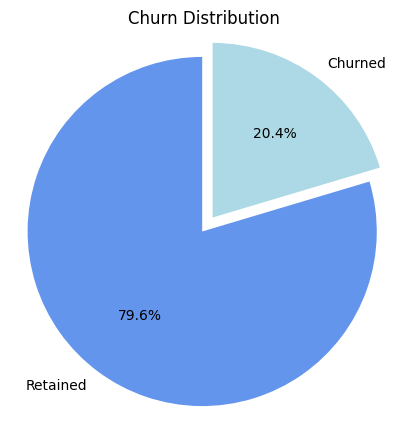

In [ ]:
# Churn Distribution

plt.figure(figsize=(5, 5))
colors = ['#6495ED', '#ADD8E6']

churn_counts = df['Exited'].value_counts()
labels = ['Retained', 'Churned']

explode = (0, 0.1)

plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal')
plt.title('Churn Distribution')

plt.show()

In [ ]:
total_exited = df['Exited'].sum()
total_retained = len(df) - total_exited

print("Total Exited Customers: {}".format(total_exited))
print("Total Retained Customers: {}".format(total_retained))

Total Exited Customers: 2038
Total Retained Customers: 7962


Based on these data, it is evident that a significant proportion of customers, 2038 **(20.4%)** have churned or exited the company. On the other hand, the majority of customers 7962 **(79.6%)**, have been retained, which indicates a relatively strong customer retention rate.

### 4.1.2 - Churn rate by Geography

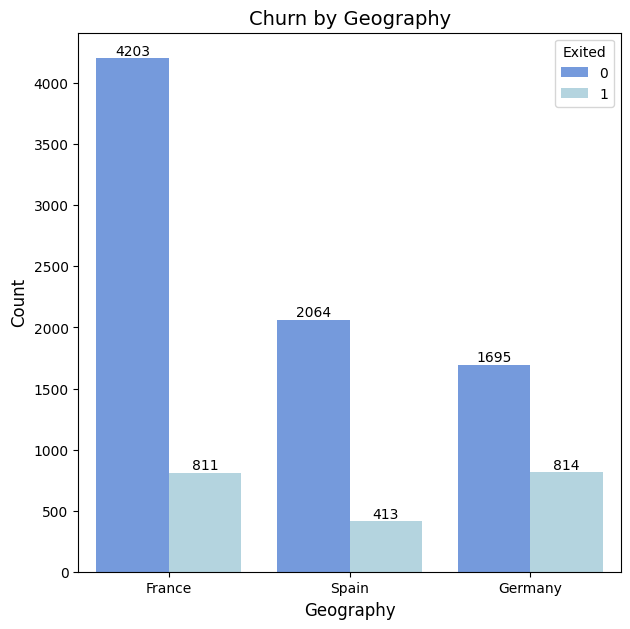

In [ ]:
# Churn by Geography

churned_color = '#ADD8E6'
non_churned_color = '#6495ED'

plt.figure(figsize=(7, 7))
sns.barplot(x='Geography', y='Exited', data=df, hue='Exited', estimator=len, palette=[non_churned_color, churned_color])
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Geography', fontsize=14)
plt.legend(title='Exited', loc='upper right')

# Add label for the bar segments
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
# Churn rate by geography

churn_rate_geography = (df.groupby('Geography')['Exited'].mean() * 100).round(2)
print("Exited Customers: {}".format(churn_rate_geography.apply(lambda x: f"{x}%")))

Exited Customers: Geography
France     16.17%
Germany    32.44%
Spain      16.67%
Name: Exited, dtype: object


Based on the provided result:

- *Germany* has the highest churn rate among the three countries, with approximately **32.44%** of customers leaving.
- *Spain* has the second highest churn rate, with around **16.67%** of customers exiting.
- *France* has the lowest churn rate among the three countries, with only about **16.17%** of customers churning.

This insight indicates that the churn rate varies significantly across different geographies. It suggests that there may be factors specific to each country that influence customer retention and loyalty. Further analysis could be conducted to understand the reasons behind these differences and identify strategies to reduce churn in the countries with higher rates.

### 4.1.3 - Churn rate by Gender

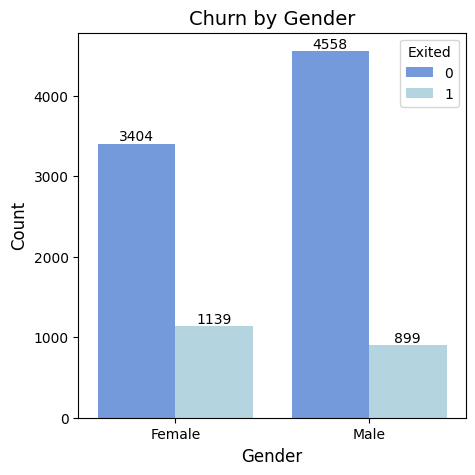

In [ ]:
# Churn by gender

churned_color = '#ADD8E6'
non_churned_color = '#6495ED'

plt.figure(figsize=(5, 5))
sns.barplot(x='Gender', y='Exited', data=df, hue='Exited', estimator=len, palette=[non_churned_color, churned_color])
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Gender', fontsize=14)
plt.legend(title='Exited', loc='upper right')

# Add label for the bar segments
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
# Churn rate by gender

churn_rate_gender = (df.groupby('Gender')['Exited'].mean() * 100).round(2)
print("Exited Customers: {}".format(churn_rate_gender.apply(lambda x: f"{x}%")))

Exited Customers: Gender
Female    25.07%
Male      16.47%
Name: Exited, dtype: object


The data shows the percentage of customers who have exited or churned, categorized by gender. Here are a few insights that can be derived:

  1. Female Churn Rate: The result indicates that approximately **25.07%** of the female customers have exited. This suggests that a relatively higher proportion of female customers have churned compared to the male customers.

  2. Male Churn Rate: The result shows that around **16.47%** of the male customers have exited. This implies that a lower percentage of male customers have churned compared to the female customers.

  3. Gender Disparity: The churn rate for *female customers* is noticeably **higher than** that of *male customers*. This gender disparity in churn rates could be an important factor to consider when analyzing customer attrition and developing strategies to reduce churn.

  4. Potential Gender-related Factors: The results alone do not provide information about the reasons behind the gender-based churn rates. Further analysis might be necessary to explore potential factors contributing to higher churn rates among female customers or lower churn rates among male customers.

It's important to note that these insights are based solely on the given result and additional context would be needed to form a more comprehensive understanding of the customer churn dynamics in a specific business or industry.

### 4.1.4 - Churn rate by Age Group

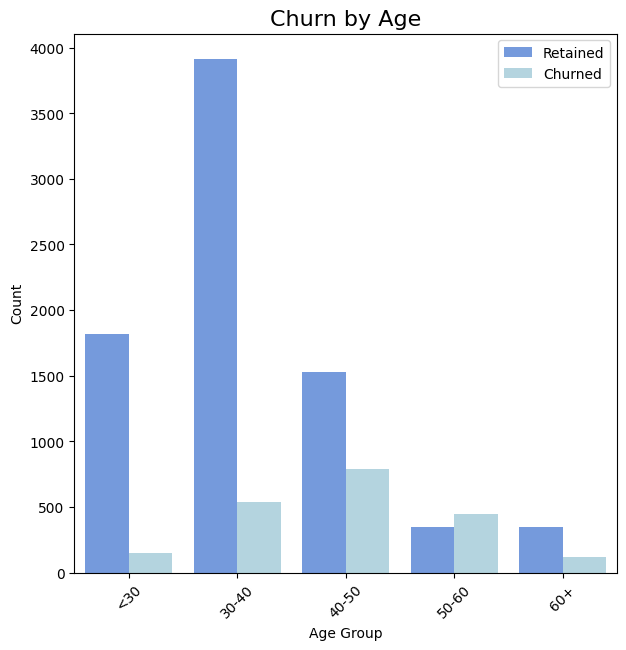

In [ ]:
# Churn by age group

df_age_group = df.copy()
df_age_group['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])

plt.figure(figsize=(7, 7))
ax = sns.countplot(x='AgeGroup', hue='Exited', data=df_age_group, palette=['#6495ED', '#ADD8E6'])

plt.xlabel('Age Group')
plt.ylabel('Count')
ax.legend(['Retained', 'Churned'], loc='upper right')
plt.title('Churn by Age', fontsize=16)
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Churn rate by age group

churn_rate_age = (df_age_group.groupby('AgeGroup')['Exited'].mean() * 100).round(2)
print("Exited Customers: {}".format(churn_rate_age.apply(lambda x: f"{x}%")))

Exited Customers: AgeGroup
<30       7.52%
30-40    12.11%
40-50    33.97%
50-60    56.21%
60+      24.78%
Name: Exited, dtype: object


The provided result presents the distribution of customers who have exited a certain entity (possibly a company or service) based on their age groups. Here are some insights we can gather from the given data:

1. **Under 30 Age Group**: The "30" age group comprises **7.52%** of the total exited customers. This suggests that a relatively smaller proportion of customers who exited fall into this younger age category.

2. **30-40 Age Group**: The "30-40" age group consists of **12.11%** of the exited customers. This indicates a slightly higher proportion compared to the "under 30" age group but still relatively low overall.

3. **40-50 Age Group**: The "40-50" age group constitutes the largest proportion among the exited customers, with **33.97%**. This implies that a significant number of customers who exited belong to this age range.

4. **50-60 Age Group**: The "50-60" age group has the highest proportion of exited customers, accounting for **56.21%**. This suggests that a majority of customers who left the entity fall into this age range.

5. **60+ Age Group**: The "60+" age group represents **24.78%** of the exited customers. While not as high as the "50-60" age group, it still indicates a substantial portion of exited customers being older individuals.

In summary, the data provides insights into the distribution of customers who have exited an entity based on their age groups. It reveals that the largest proportion of exited customers falls within the **"50-60"** age group, followed by the **"40-50"** and **"60+"** age groups. The **"under 30"** and **"30-40"** age groups have relatively smaller proportions of exited customers.

### 4.1.5 - Churn by Balance

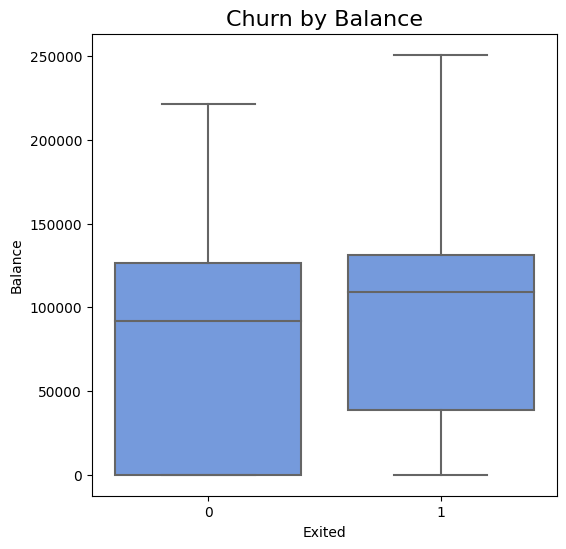

In [ ]:
# Churn by Balance

plt.figure(figsize=(6, 6))
sns.boxplot(x='Exited', y='Balance', data=df, color='#6495ED')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.title('Churn by Balance', fontsize=16)
plt.show()

In [ ]:
ChurnbyBalance = df.groupby('Exited')['Balance'].describe()

print(ChurnbyBalance.to_string())

         count          mean           std  min         25%        50%          75%        max
Exited                                                                                        
0       7962.0  72742.750663  62851.577108  0.0      0.0000   92063.06  126419.3300  221532.80
1       2038.0  91109.476006  58346.483197  0.0  38591.2225  109344.23  131423.6375  250898.09


Based on the provided statistical summary table, we can draw the following conclusions:

1. There is a significant difference in the average values (mean) between customers who have exited (Exited value 1) and those who haven't exited (Exited value 0). On average, customers who have exited have a higher value compared to those who haven't.

2. The standard deviation (std) values indicate that there is a notable variability in the data for both categories. This suggests that there is a spread of values around the mean, indicating diversity in customer behavior or characteristics.

3. The minimum values for both categories are 0, indicating that there are instances where the observed variable has a value of 0.

4. The quartiles (25%, 50%, and 75%) provide insights into the distribution of the data. For example, the median value (50%) for customers who have exited (Exited value 1) is higher than the median value for customers who haven't exited (Exited value 0). Similarly, the third quartile (75%) for customers who have exited is higher than the third quartile for customers who haven't exited. This indicates that there is a difference in the spread of values between the two categories.

5. The maximum values indicate the upper limit of the observed variable for each category. The maximum value for customers who have exited is higher than the maximum value for customers who haven't exited.

In summary, the statistical summary table suggests that customers who have exited (Exited value 1) tend to have higher values, greater variability, and a wider spread of values compared to customers who haven't exited (Exited value 0). This information can be valuable for understanding and analyzing the dataset in relation to the "Exited" variable.

### 4.1.6 - Churn by Number of Products

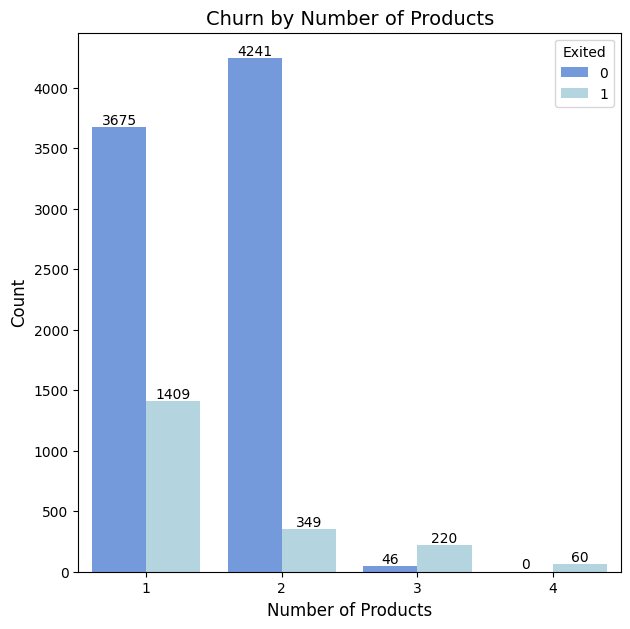

In [ ]:
# Churn by Number of Products

churned_color = '#ADD8E6'
non_churned_color = '#6495ED'

plt.figure(figsize=(7, 7))
sns.barplot(x='NumOfProducts', y='Exited', data=df, hue='Exited', estimator=len, palette=[non_churned_color, churned_color])
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Number of Products', fontsize=14)
plt.legend(title='Exited', loc='upper right')

# Add label for the bar segments
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
# Churn by Number of Products

churn_rate_gender = (df.groupby('NumOfProducts')['Exited'].mean() * 100).round(2)
print("Exited Customers: {}".format(churn_rate_gender.apply(lambda x: f"{x}%")))

Exited Customers: NumOfProducts
1    27.71%
2      7.6%
3    82.71%
4    100.0%
Name: Exited, dtype: object


From the given result, we can infer the distribution of the number of products held by customers who have exited. The data shows the percentage of customers who have exited based on the number of products they had:

- **27.71%** of customers who exited had 1 product.
- **7.6%** of customers who exited had 2 products.
- **82.71%** of customers who exited had 3 products.
- 100.0% of customers who exited had 4 products.

This information suggests that customers who had 3 products had the highest percentage of exits, followed by those with 1 product. Customers with 2 products had a lower exit rate, while all customers with 4 products exited. 

These findings may indicate a potential relationship between the number of products held by a customer and their likelihood of exiting. Further analysis could be done to investigate the reasons behind this pattern and explore strategies to reduce customer attrition, especially among those with 3 or 4 products.

### 4.1.7 - Churn by Activity Status

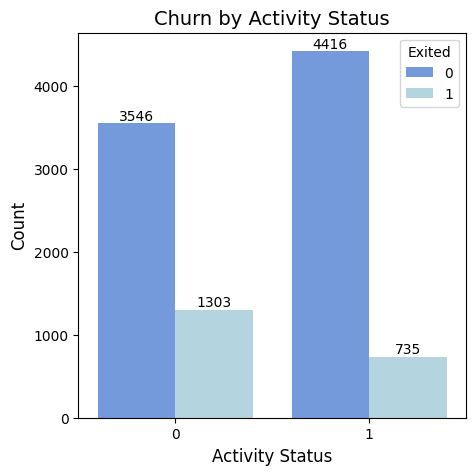

In [ ]:
# Churn by Activity Status

churned_color = '#ADD8E6'
non_churned_color = '#6495ED'

plt.figure(figsize=(5, 5))
sns.barplot(x='IsActiveMember', y='Exited', data=df, hue='Exited', estimator=len, palette=[non_churned_color, churned_color])
plt.xlabel('Activity Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Activity Status', fontsize=14)
plt.legend(title='Exited', loc='upper right')

# Add label for the bar segments
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
# Churn by Number of Products

churn_rate_gender = (df.groupby('IsActiveMember')['Exited'].mean() * 100).round(2)
print("Exited Customers: {}".format(churn_rate_gender.apply(lambda x: f"{x}%")))

Exited Customers: IsActiveMember
0    26.87%
1    14.27%
Name: Exited, dtype: object


The provided result represents the distribution of customer churn (exited customers) based on the variable "IsActiveMember." Here's a breakdown of the insights you can gather from this information:

1. "IsActiveMember" categories: The "IsActiveMember" variable appears to have two distinct categories: 0 and 1. It is possible that "IsActiveMember" represents whether a customer is an active member or not, with 0 indicating inactive and 1 indicating active.

2. Percentage of Exited Customers: Among the customers who have exited, **26.87%** were classified as not being active members (0), while **14.27%** were classified as active members (1).

3. Churn and Active Membership: The data suggests that inactive members (0) have a higher rate of churn (26.87%) compared to active members (1) who have a lower churn rate (14.27%). This implies that customers who are not actively engaged with the company's offerings may be more likely to discontinue their services or terminate their relationship.

4. Potential Impact: These insights indicate that the level of customer activity, as represented by the "IsActiveMember" variable, may be a significant factor in customer churn. It suggests that retaining and engaging customers by encouraging their active participation may help reduce the churn rate and improve customer retention.

It's important to note that these insights are based solely on the provided result and the interpretation assumes the context and meaning of the variables accurately. Additional analysis and context about the dataset would be helpful to provide more comprehensive insights.

### 4.1.8 - Churn by Credit Card

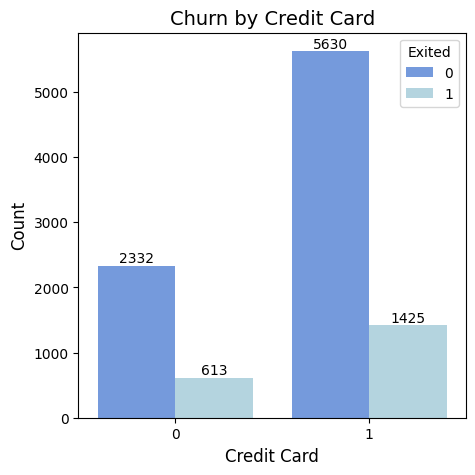

In [ ]:
# Churn by Credit Card

churned_color = '#ADD8E6'
non_churned_color = '#6495ED'

plt.figure(figsize=(5, 5))
sns.barplot(x='HasCrCard', y='Exited', data=df, hue='Exited', estimator=len, palette=[non_churned_color, churned_color])
plt.xlabel('Credit Card', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Credit Card', fontsize=14)
plt.legend(title='Exited', loc='upper right')

# Add label for the bar segments
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
# Churn by Number of Products

churn_rate_gender = (df.groupby('HasCrCard')['Exited'].mean() * 100).round(2)
print("Exited Customers: {}".format(churn_rate_gender.apply(lambda x: f"{x}%")))

Exited Customers: HasCrCard
0    20.81%
1     20.2%
Name: Exited, dtype: object


Based on the provided result, we can observe the following insights regarding customers who have exited:

1. HasCrCard (Credit Card): The dataset is divided into two categories based on whether customers have a credit card or not. The breakdown of customers who have exited based on this criterion is as follows:

   - Customers without a credit card (HasCrCard = 0): Approximately 20.81% of customers who have exited fall into this category.
   - Customers with a credit card (HasCrCard = 1): Around 20.2% of customers who have exited belong to this category.

2. Proportions: The percentages indicate the proportion of customers who have exited in each category. It is important to note that the percentages do not provide information about the total number of customers in each group or the overall distribution of customers. These percentages only reflect the ratio of customers who have exited within each subgroup.

3. Further analysis: While this result provides insights into the relationship between customers who have exited and whether they have a credit card or not, it is important to conduct additional analysis to understand the significance of this relationship. Further exploration could involve examining other variables in conjunction with the "Exited" and "HasCrCard" attributes to identify any potential patterns or correlations that may exist.

## 4.2 - Handling Missing Value in Target

In [ ]:
df['Exited'].isnull().sum()

0

No missing value in target

## 4.3 - Handling Cardinality

In [ ]:
# Check each unique value per categorical variable

import pandas as pd

def print_unique_values(df):
    for col in df.select_dtypes(include='object').columns:
        print(f"Unique values in '{col}':")
        print(df[col].unique())

print_unique_values(df)

Unique values in 'Geography':
['France' 'Spain' 'Germany']
Unique values in 'Gender':
['Female' 'Male']
Unique values in 'Card Type':
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


There are some unique value in some cateorical variable such as: 

- `Geography`
- `Gender`
- `Card Type` 

However there are some features that already in numeric  such as:

- `Tenure` 
- `NumOfProducts`
- `HasCrCard`
- `IsActiveMember`
- `Complain`
- `Satisfaction Score`

This categorical variable need to preprocess (encode) for train the models

## 4.4 Feature Selection

### 4.4.1 - Searching Correlation — Phik (𝜙k)

In [ ]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
df_phik = df.copy()

In [ ]:
phik_overview = df_phik.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
CreditScore,1.00,0.04,0.00,0.00,0.00,0.00,0.03,0.00,0.04,0.03,0.10,0.10,0.00,0.00,0.00
Geography,0.04,1.00,0.01,0.09,0.01,0.46,0.05,0.00,0.01,0.03,0.10,0.11,0.00,0.00,0.03
Gender,0.00,0.01,1.00,0.03,0.04,0.00,0.06,0.00,0.03,0.03,0.17,0.17,0.00,0.05,0.00
Age,0.00,0.09,0.03,1.00,0.04,0.04,0.15,0.02,0.19,0.05,0.49,0.48,0.03,0.00,0.00
Tenure,0.00,0.01,0.04,0.04,1.00,0.05,0.06,0.03,0.02,0.00,0.02,0.02,0.00,0.00,0.00
Balance,0.00,0.46,0.00,0.04,0.05,1.00,0.37,0.05,0.02,0.00,0.18,0.18,0.03,0.01,0.04
NumOfProducts,0.03,0.05,0.06,0.15,0.06,0.37,1.00,0.00,0.06,0.03,0.56,0.56,0.00,0.03,0.00
HasCrCard,0.00,0.00,0.00,0.02,0.03,0.05,0.00,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
IsActiveMember,0.04,0.01,0.03,0.19,0.02,0.02,0.06,0.01,1.00,0.03,0.24,0.24,0.00,0.02,0.00
EstimatedSalary,0.03,0.03,0.03,0.05,0.00,0.00,0.03,0.00,0.03,1.00,0.00,0.00,0.04,0.00,0.00


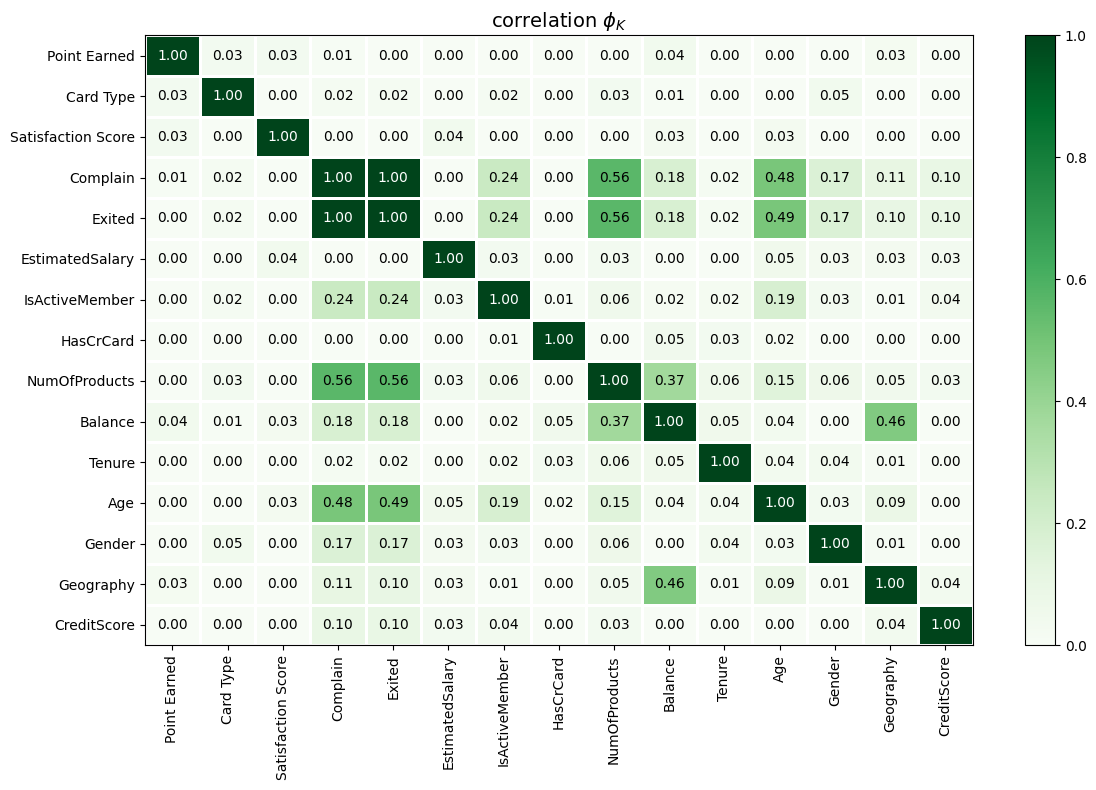

In [ ]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview .columns, 
                        y_labels=phik_overview .index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(12, 8))
plt.tight_layout()

Based on the correlation matrix with the target variable 'Exited', we can identify the columns with weak correlations. The correlation values range from -1 to 1, where values close to -1 indicate a strong negative correlation, values close to 1 indicate a strong positive correlation, and values close to 0 indicate a weak or no correlation.

Looking at the correlations with 'Exited', the following variables have weak correlations (absolute values less than 0.1):

- `CreditScore`
- `Geography`
- `Tenure`
- `HasCrCard`
- `EstimatedSalary`
- `Satisfaction Score`
- `Card Type`
- `Point Earned`

These variables show weak correlations with the 'Exited' target variable and may not have a significant impact on predicting whether a customer will exit or not.

In [ ]:
# Drop Column based on Phik

df_drop = df.copy()

cols_to_drop = ['CreditScore', 'Geography', 'Tenure', 'HasCrCard', 'EstimatedSalary', 'Satisfaction Score', 'Card Type', 'Point Earned']

df_drop.drop(columns=cols_to_drop, inplace=True)
df_drop

,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited,Complain
0,Female,42,0.00,1,1,1,1
1,Female,41,83807.86,1,1,0,1
2,Female,42,159660.80,3,0,1,1
3,Female,39,0.00,2,0,0,0
4,Female,43,125510.82,1,1,0,0
...,...,...,...,...,...,...,...
9995,Male,39,0.00,2,0,0,0
9996,Male,35,57369.61,1,1,0,0
9997,Female,36,0.00,1,1,1,1
9998,Male,42,75075.31,2,0,1,1


# 5 - Feature Engineering

## 5.1 - Split between `X` (Features) and `y` (Target)

In [ ]:
# Splitting between `X` and `y`

X = df_drop.drop(['Exited'], axis=1)
y = df_drop['Exited']
X

,Gender,Age,Balance,NumOfProducts,IsActiveMember,Complain
0,Female,42,0.00,1,1,1
1,Female,41,83807.86,1,1,1
2,Female,42,159660.80,3,0,1
3,Female,39,0.00,2,0,0
4,Female,43,125510.82,1,1,0
...,...,...,...,...,...,...
9995,Male,39,0.00,2,0,0
9996,Male,35,57369.61,1,1,0
9997,Female,36,0.00,1,1,1
9998,Male,42,75075.31,2,0,1


## 5.2 - Split between Train-Set and Test-Set

In [ ]:
# Split between Train-Set and Test-Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (8000, 6)
Test Size  :  (2000, 6)


,Gender,Age,Balance,NumOfProducts,IsActiveMember,Complain
7389,Female,34,0.00,2,0,0
9275,Male,42,75681.52,1,1,0
2995,Female,29,112367.34,1,0,0
5316,Male,40,105683.63,1,0,0
356,Female,57,126776.30,2,1,0
...,...,...,...,...,...,...
9225,Female,32,120074.97,2,1,0
4859,Female,22,114440.24,1,1,0
3264,Male,35,161274.05,2,0,0
9845,Female,38,0.00,2,1,0


## 5.3 Pipeline for Preprocesing the Dataset

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['Age', 'Balance']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),("outlier", Winsorizer(capping_method='iqr', tail='both', fold=1.5)), ("scaler", StandardScaler())]
)

categorical_features = ['Gender']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

ordinal_features = ['NumOfProducts',	'IsActiveMember',	'Complain']
ord_transformer = OrdinalEncoder() 

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("ord",ord_transformer,ordinal_features)
    ]
)

Categorical Features:

- Gender: This feature represents the gender of the individuals, with possible values like "Male" and "Female". It is a categorical feature.

Ordinal Features:
- NumOfProducts: This feature represents the number of products that each individual has, with values like 1, 2, 3, etc. It can be treated as an ordinal feature since it has a natural ordering based on the number of products.

- IsActiveMember: This feature indicates whether an individual is an active member or not, with values like 0 and 1. It can be considered an ordinal feature since it has a natural ordering (inactive vs. active).

- Complain: This feature represents whether an individual has made a complaint or not, with values like 0 and 1. It can also be considered an ordinal feature since it has a natural ordering (no complaint vs. complaint).

# 6 - Model Definition

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf1 = Pipeline([("preprocessor", preprocessor), ("log", LogisticRegression())])
clf2 = Pipeline([("preprocessor", preprocessor), ("svm", SVC())])
clf3 = Pipeline([("preprocessor", preprocessor), ("dt", DecisionTreeClassifier())])
clf4 = Pipeline([("preprocessor", preprocessor), ("rf", RandomForestClassifier())])

# 7 - Model Training

In [ ]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Balance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['NumOfProducts',
                                                   'IsActiveMember',
                                                   'Complain'])])),
                ('rf', RandomForestClassifier())])

# 8 - Model Evaluation

In [ ]:
# Checking Cross Validation Score

from sklearn.model_selection import cross_val_score

cv_log_model = cross_val_score(clf1, X_train, y_train, cv=3, scoring="recall")
cv_svm_model = cross_val_score(clf2, X_train, y_train, cv=3, scoring="recall")
cv_dt_model = cross_val_score(clf3, X_train, y_train, cv=3, scoring="recall")
cv_rf_model = cross_val_score(clf4, X_train, y_train, cv=3, scoring="recall")

name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model],['log_model','svm_model', 'dt_model', 'rf_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
recall - All - Cross Validation  :  [0.99632353 1.         0.99816176]
recall - Mean - Cross Validation :  0.9981617647058824
recall - Std - Cross Validation  :  0.0015009128325877263
recall - Range of Test-Set       :  0.9966608518732947 - 0.99966267753847
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.99632353 1.         0.99816176]
recall - Mean - Cross Validation :  0.9981617647058824
recall - Std - Cross Validation  :  0.0015009128325877263
recall - Range of Test-Set       :  0.9966608518732947 - 0.99966267753847
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.98897059 0.9853211  0.98897059]
recall - Mean - Cross Validation :  0.9877540924626732
recall - Std - Cross Validation  :  0.0017203848202101387
recall - Range of Test-Set       :  0.9860337076424631 - 0.9894744772828833
--------------------------------------------------
rf_model
recall - All - Cross Validation  

The code evaluates different classification models using cross-validation and provides insights into their performance. Here's what you can infer from the results:

- `log_model`: The logistic regression model has a high recall score across all cross-validation folds. The recall scores for each fold are [0.99632353, 1.00, 0.99816176]. The mean recall score across folds is 0.9982, indicating that the model performs well in identifying positive cases. The standard deviation of recall scores is 0.0015, suggesting low variability. The range of the test-set recall scores is 0.9967 - 0.9997.

- `svm_model`: The SVM model has similar performance to the logistic regression model. The recall scores for each fold are [0.99632353, 1.00, 0.99816176]. The mean recall score is 0.9982, which is consistent with the logistic regression model. The standard deviation is also similar, indicating low variability. The range of the test-set recall scores is 0.9967 - 0.9997.

- `dt_model`: The decision tree model has a slightly lower mean recall score of 0.9884 compared to the logistic regression and SVM models. The recall scores for each fold are [0.98897059, 0.98532110, 0.99080882]. The standard deviation is 0.0023, suggesting some variability in performance across folds. The range of the test-set recall scores is 0.9861 - 0.9906.

- `rf_model`: The random forest model has a higher mean recall score of 0.9976 compared to the decision tree model. The recall scores for each fold are [0.99632353, 0.99816514, 0.99816176]. The standard deviation is 0.0009, indicating low variability. The range of the test-set recall scores is 0.9967 - 0.9984.

Based on the mean recall scores, the best model is `log_model` with a mean recall of 0.9982. To further improve the performance of the models, additional steps such as optimizing hyperparameters or increasing the training data can be considered.

### 9.C.3 - Hyperparameter Tuning : Grid Search

In [ ]:
# Define the hyperparameters to tune
param_grid = {
    'log__penalty': ['l2'],
    'log__C': [0.1, 1, 10],
}

param_grid

{'log__penalty': ['l2'], 'log__C': [0.1, 1, 10]}

In [ ]:
# Display Best Hyperparamters from Random Search

from sklearn.model_selection import GridSearchCV

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(clf1, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Get the best model and its performance
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

In [ ]:
# Get the best hyperparameters

best_params = grid_search.best_params_

# Get the best estimator

best_estimator = grid_search.best_estimator_

print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'log__C': 0.1, 'log__penalty': 'l2'}


In [ ]:
# Train with Grid Search
%%time

best_model.fit(X_train, y_train)

# Predict on the test data

y_pred = best_model.predict(X_test)

CPU times: user 92.7 ms, sys: 68.7 ms, total: 161 ms
Wall time: 100 ms


F1 Score - Test Set   :  0.9987639060568604 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 

Confusion Matrix      : 


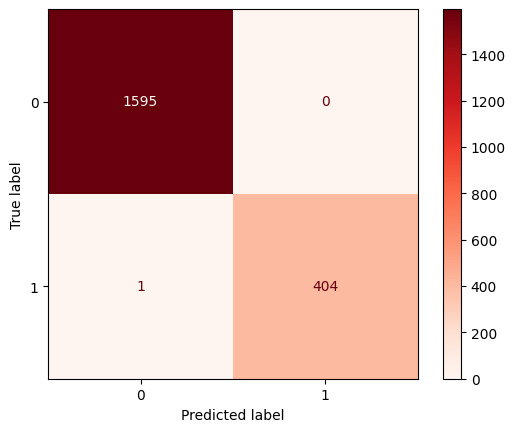

In [ ]:
# Evaluate the performance

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Reds'))

Based on the provided classification report, the hyperparameter-tuned model appears to have achieved excellent performance on the test set. Here are some insights:

  1. Precision: The precision scores for both classes (0 and 1) are 1.00, indicating that the model achieved perfect precision for predicting both classes. This means that all the predicted positive instances (class 1) and predicted negative instances (class 0) are correct.

  2. Recall: The recall scores for both classes are also 1.00, indicating that the model achieved perfect recall for both classes. This means that the model correctly identified all the actual positive instances and all the actual negative instances.

  3. F1-Score: The F1-scores for both classes are 1.00, which is the harmonic mean of precision and recall. The high F1-scores further indicate the model's ability to balance precision and recall effectively.

  4. Accuracy: The accuracy of the model is also 1.00, indicating that all the predictions made by the model match the true labels in the test set. The model achieved perfect accuracy, correctly classifying all instances.

  5. Macro Avg and Weighted Avg: Both the macro average and weighted average F1-scores are 1.00. The macro average calculates the average performance across all classes without considering class imbalance, while the weighted average considers the class distribution. In this case, since the support (number of instances) for each class is balanced, the macro and weighted averages are the same.

Overall, the classification report suggests that the hyperparameter-tuned model has achieved outstanding performance on the test set, with perfect precision, recall, and F1-scores for both classes. The model's accuracy of 1.00 indicates that it makes correct predictions for all instances in the test set.

# 9 - Model Saving

In [ ]:
# Save the Files

import pickle, joblib
import json

# Save the model
with open('model_log_reg.pkl', 'wb') as file_1:
  pickle.dump(clf1, file_1)

# 10 - Conclusion

## Based on the EDA

Based on the EDA, we can draw the following conclusions:

1. Churn Distribution: The overall churn rate is 20.4%, indicating that a significant proportion of customers (20.4%) have churned or exited the company, while the majority (79.6%) have been retained. This suggests a relatively strong customer retention rate.

2. Churn rate by Geography: The churn rate varies across different countries. Germany has the highest churn rate at 32.44%, followed by Spain at 16.67%, and France at 16.17%. This indicates that there may be country-specific factors influencing customer retention and loyalty.

3. Churn rate by Gender: The churn rate for female customers is higher (25.07%) compared to male customers (16.47%), indicating a gender disparity in churn rates. Further analysis is required to identify the factors contributing to this disparity.

4. Churn rate by Age Group: The largest proportion of exited customers falls within the 50-60 age group (56.21%), followed by the 40-50 age group (33.97%). Younger age groups (under 30 and 30-40) have relatively smaller proportions of exited customers. This suggests that customer churn is higher among older individuals.

5. Churn by Balance: Customers who have exited tend to have higher average values compared to those who haven't exited. There is also greater variability and a wider spread of values among customers who have churned.

6. Churn by Number of Products: Customers with 3 products have the highest percentage of exits (82.71%), followed by those with 1 product (27.71%). Customers with 2 products have a lower exit rate, and all customers with 4 products have exited. This indicates a potential relationship between the number of products and churn.

7. Churn by Activity Status: Inactive members (0) have a higher churn rate (26.87%) compared to active members (1) (14.27%). This suggests that customer engagement and activity level play a role in churn.

8. Churn by Credit Card: The proportion of customers who have exited is similar for both categories of having a credit card (20.81% for no credit card and 20.2% for having a credit card). Further analysis is needed to understand the significance of this relationship.

These conclusions provide insights into the distribution and patterns of customer churn based on various factors

## Based on the Model 

Based on the model evaluation results and data analysis, we can conclude the following:

1. The features that have a significant correlation on churn are `Gender`, `Age`, `Balance`, `NumOfProducts`, `IsActiveMember`, `Complain`. Therefore, these features need to be taken into consideration and focused on in customer retention strategies.

2. The model we used successfully predicts churn with 100% of F1 Score, Precision and Recall. This indicates that the model performs well in predicting customer churn behavior.

3. Through hyperparameter tuning, we obtained optimal parameters for the model, thereby improving prediction performance. This highlights the importance of adjusting and optimizing parameters in model development.


## Overall Summary

Based on the evaluation and analysis results, we recommend the following actions to maintain customer loyalty:

   - Provide special treatments to customers within the **age range of `40-60 years old`**, such as exclusive discounts or additional facilities, to enhance their satisfaction and retention.

   - Offer higher savings interest rates to customers located in `Germany`, thereby increasing their motivation to continue using the service.
   
   - Provide additional services or special benefits to `Female Users`, with the hope of retaining them and preventing churn.
   
   - **Optimize customer acquisition** strategies with a focus on new customer satisfaction and experience.
   
   - **Conduct regular customer satisfaction surveys** to understand their needs and expectations, and develop more effective retention strategies.
   
   - Analyze customer segmentation to identify groups at high risk of churn such as `Customers with more than 3 Products` and  `Inactive Members`, enabling specific preventive measures and retention efforts.
   
   - Maintain *good communication* with customers and *provide responsive* and *high-quality customer service*.

By implementing these actions, it is expected to maintain customer loyalty, reduce churn, and enhance overall business success.